In [2]:
!pwd

/home/philmart2021/seizure_prediction/SafeSeizure/notebooks


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

### Open each file "preictal" for patient_1 and calculate the channel (sensor) mean for each time observation

In [4]:
def get_statistics():
    '''Function that extracts the data from each .csv file, 
    already downsampled by a factor of 100'''
   
  
    # Reads each .csv file in patient_1 directory, calculate the mean for each file and concatenate each mean
    # into a new database

    temp = []
    for index in tqdm(range(1, 19)): #18 files here
        temp_df = pd.read_csv(os.path.join(os.getcwd(),f'../SafeSeizure/data/Patient_1_csv/preictal_segment_{index}.csv'))
        mean_values = temp_df.mean(axis=0)
        temp.append(mean_values)
    
    return pd.concat(temp, axis=1)

In [5]:
df_average = get_statistics()

100%|██████████| 18/18 [00:39<00:00,  2.22s/it]


In [6]:
# display of the new average value dataset
df_average

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,39584.662120,7765.782241,-6342.114820,-21926.421639,-21317.503244,11830.143499,-143.860388,-163.533607,254.509298,18.270398,-196.880923,-31.998133,-135.504035,-418.866354,117.092627,396.522671,136.453575,141.173471
1,-5081.996748,-3180.714290,2978.220921,3780.692730,3987.523888,-22358.535928,-101.424110,-207.061679,-11.128980,23.884829,-191.322783,-42.879383,-156.308551,-448.680050,97.496618,349.955552,143.951605,131.657297
2,7089.236527,-1297.516358,-742.504416,-595.182429,-2819.178780,-19158.984662,-126.018541,-215.806795,60.456069,19.710271,-183.853852,-55.593375,-131.445153,-384.666921,93.499745,366.928713,196.018801,132.075971
3,3452.960436,61.641434,1265.105905,20.151857,123.167623,-21517.614350,-172.322643,-164.679746,75.604415,26.372431,-197.034244,-68.702551,-112.699060,-347.057256,108.719343,390.156542,224.979746,119.890120
4,4294.468107,-803.320512,141.803760,892.044040,-754.406547,-21672.038445,-134.738948,-157.299506,51.023128,4.044737,-195.956411,-74.692647,-129.545889,-377.546300,85.678610,391.456124,165.958364,133.341617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1104.290317,650.773251,-601.833987,-278.098011,1342.897724,-21876.230282,-1.809212,-55.021868,-182.433412,-106.564742,-76.168013,177.439401,24.672884,-12.013451,-22.067968,-20.940611,160.754416,291.695229
29996,-1468.319740,1823.789556,-669.194542,1139.741024,671.381618,-21008.443234,22.676070,-61.183975,-183.603389,-110.549918,-87.435822,158.819343,59.580304,-50.613183,-35.685942,21.855313,159.167973,311.237919
29997,-17095.178491,-1389.765039,-671.129885,-2761.773396,-610.783348,-20001.237167,34.135173,-36.289041,-182.247281,-121.076137,-54.162538,163.106511,49.953542,-74.815799,-60.141458,41.199696,161.318432,285.724279
29998,-11053.449315,4414.690279,-701.454476,4142.242305,-2542.174937,-19451.694057,-1.834816,-30.228296,-184.752060,-115.333296,-23.557272,161.882542,83.025003,-65.468754,-28.174790,11.894072,176.894806,286.371324


In [7]:
df_average[0]

0        39584.662120
1        -5081.996748
2         7089.236527
3         3452.960436
4         4294.468107
             ...     
29995     1104.290317
29996    -1468.319740
29997   -17095.178491
29998   -11053.449315
29999    -6118.075864
Name: 0, Length: 30000, dtype: float64

<AxesSubplot:>

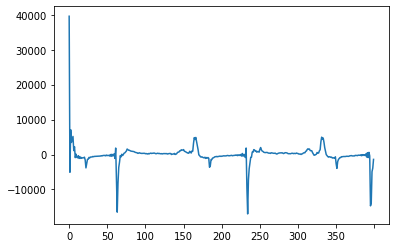

In [8]:
# take the preictal segment_4 file as reference for ARIMA model (First 400 time units for visualisazation )
y = df_average[3]
df_average[0][:400].plot()

### Check stationarity

In [9]:
# Check its stationarity precisely using the Augmented Dick Fuller test, and especially its p-value
y = df_average[3]
print('p-value: ', adfuller(y)[1])

p-value:  0.0


### Stationarize the time series

In [10]:
# Here there is no need to do it since since no seasonal time series

### Plot autocorrelation plot (plot_acf) 

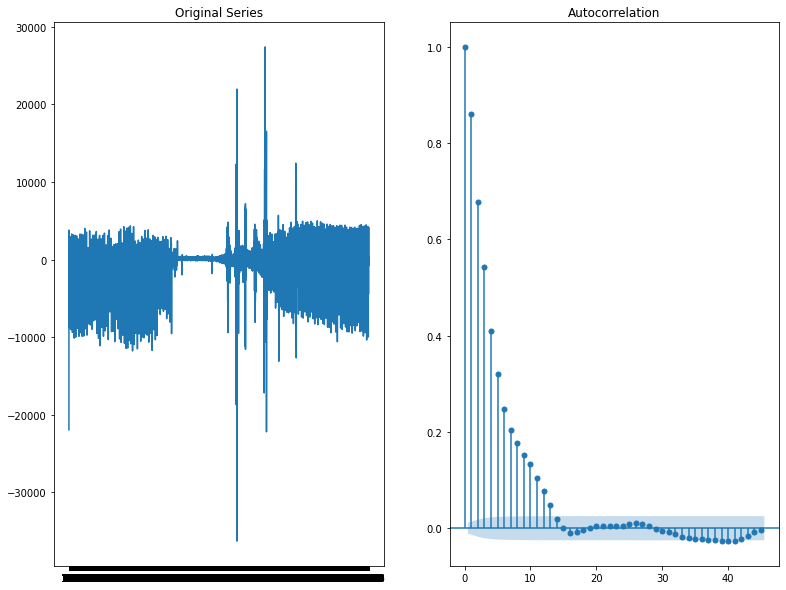

In [11]:
# Original Series, plot autocorrelation plot (plot_acf)
fig, axes = plt.subplots(1, 2, figsize=(13,10))
axes[0].plot(y); axes[0].set_title('Original Series')
plot_acf(y, ax=axes[1])

plt.show()

### Determination of differentiation "d" and "I" coefficient of ARIMA

In [12]:
#In our case, no differentiation is made (series is stationnary already, d=0) and I=6

### Select AR order (p) and MA order (q)

In [13]:
# MA order (q) can be found by looking at the autocorrelation plot (plot_acf)


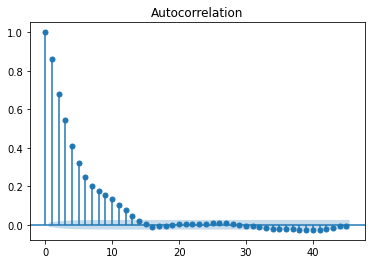

In [14]:
plot_acf(y);

In [15]:
# Based on the above graph, q=6 (already present in previous acf graph, no differentiation was needed)

In [16]:
# AR order (p) can be found by investigating the partial autocorrelation plot plot_pacf applied to y (diff if applicable).

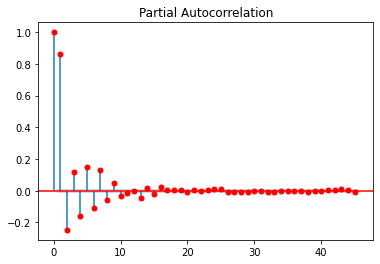

In [17]:
plot_pacf(y, c='r');

In [18]:
# Based on the above graph, p=3 

### Build the model with train set 66% and test set 34%

In [19]:
# split into train and test sets
X = df_average[0].values
train_size = int(len(X) * 0.66)
train, test = X[:train_size], X[train_size:]

In [20]:
# initialize the model
# p=3, d=0 ,q=6 based on the first segment preictal file [0,400] time units. Due to computation limit, parameters are now changed
# to p=0, d=1 ,q=0
arima = ARIMA(train, order=(0, 1, 0))

# fit the model
arima = arima.fit()

# evaluate the model arima
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                19799
Model:                 ARIMA(0, 1, 0)   Log Likelihood             -171325.606
Method:                           css   S.D. of innovations           1386.180
Date:                Mon, 21 Jun 2021   AIC                         342655.212
Time:                        17:08:20   BIC                         342670.999
Sample:                             1   HQIC                        342660.380
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9768      9.851     -0.201      0.841     -21.285      17.332
==============================================================================
"""

In [21]:
# Prepare the forecasts (predict the values of the time series based on train one)
forecast = arima.forecast(steps=len(test)) 

In [22]:
forecast

(array([   443.23030976,    441.25346977,    439.27662978, ...,
        -19714.60707239, -19716.58391238, -19718.56075237]),
 array([  1386.17978519,   1960.3542521 ,   2400.93381637, ...,
        139983.56996159, 139990.4330788 , 139997.29585955]),
 array([[  -2273.6321453 ,    3160.09276483],
        [  -3400.97026128,    4283.47720083],
        [  -4266.46717956,    5145.02043913],
        ...,
        [-294077.36262446,  254648.14847967],
        [-294092.79092699,  254659.62310222],
        [-294108.21857009,  254671.09706534]]))

In [23]:
len(forecast)

3

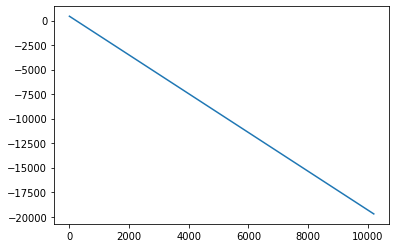

In [24]:
plt.plot(forecast[0])

In [25]:
# Determine the mean square error
test_score = mean_squared_error(test, forecast[0])
print('Test MSE: %.3f' % test_score)

Test MSE: 129145987.583


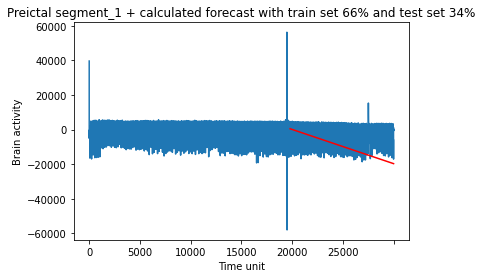

In [26]:
# Plot the dataset preictal_segment_1 with the forecast (forecast starting from the end of the train set and having a 
# length of the test set)

df_average[0].plot()
plt.plot(np.arange(len(df_average[0]))[train_size:], forecast[0],c='red')
plt.title('Preictal segment_1 + calculated forecast with train set 66% and test set 34%')
plt.xlabel('Time unit')
plt.ylabel('Brain activity')
plt.show()

### Build the model with train set 90% and test set 10%

In [27]:
# split into train and test sets
X = df_average[0].values
train_size_2 = int(len(X) * 0.90)
train_2, test_2 = X[:train_size_2], X[train_size_2:]

In [28]:
# initialize the second model
# p=3, d=0 ,q=6 based on the first segment preictal file [0,400] time units. Due to computation limit, parameters are now changed
# to p=0, d=1 ,q=0
arima = ARIMA(train_2, order=(0, 1, 0))

# fit the second model
arima = arima.fit()

# evaluate the second model arima
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                26999
Model:                 ARIMA(0, 1, 0)   Log Likelihood             -233285.846
Method:                           css   S.D. of innovations           1368.674
Date:                Mon, 21 Jun 2021   AIC                         466575.692
Time:                        17:08:24   BIC                         466592.099
Sample:                             1   HQIC                        466580.983
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3495      8.330     -0.162      0.871     -17.675      14.976
==============================================================================
"""

In [29]:
# Prepare the forecasts (predict the values of the time series based on train one)
forecast_2 = arima.forecast(steps=len(test_2)) 

In [30]:
# Determine the mean square error
test_score_2 = mean_squared_error(test_2, forecast_2[0])
print('Test MSE: %.3f' % test_score_2)

Test MSE: 7465585.502


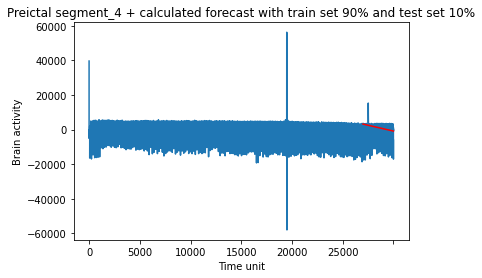

In [31]:
# Plot the dataset preictal_segment_1 with the second forecast (forecast starting from the end of the train set and having a 
# length of the test set)

df_average[0].plot()
plt.plot(np.arange(len(df_average[0]))[train_size_2:], forecast_2[0],c='red')
plt.title('Preictal segment_4 + calculated forecast with train set 90% and test set 10%')
plt.xlabel('Time unit')
plt.ylabel('Brain activity')
plt.show()